In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
import os
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'


In [3]:
target = 'VDPRIVRRYLLRRQLGQGAYGIVWKAVDRRTGEVVAIKKIFDAFRDKTDAQRTFREITLLQEFGDHPNIISLLDVIRAENDRDIYLVFEFMDTDLNAVIRKGGLLQDVHVRSIFYQLLRATRFLHSGHVVHRDQKPSNVLLDANCTVKLCDFGLARSLGDLPEGP----EDQAVTEYVATRWYRAPEVLLSSHRYTLGVDMWSLGCILGEMLRGRPLFPGTSTLHQLELILETIPPPSEEDLLALGSGCRASVLHQLGSRPRQTLDALLPPDTSPEALDLLRRLLVFAPDKRLSATQALQHPYVQRFHCPSDEWAREADVRPRAHEGVQLSVPEYRSRVYQMILECGGSSGTSREKGPEGVSPSQAHLHKPRADPQLPSRTPVQGPRPRPQSSPGHDPAEHESPRAAKNVPRQNSAPLLQTALLGNGERPPGAKEAPPLTLSLVKPSGRGAAPSLTSQAAAQVANQALIRGDWNRGGGVRVASVQQVPPRLPPEARPGRRMFSTSALQGAQGGARALLGGYSQAYGTVCHSALGHLPLLEGHHV'
metadata_all = ['6v6a.json', '3oz6.json', '8ztc.json']
def parse_qmean(metadata:list):
    qmeans = {}
    
    for metadata in metadata_all:
        with open(os.path.join('metadata', metadata), 'r', encoding='utf-8') as file:
            data = json.load(file)
            chain = list(data['targets'][0]['keyseq_annotation'])[0]
            qmean = data['targets'][0]['keyseq_annotation'][chain]['qmean']
            print(len(qmean))
        key = re.search(r'(.+)\.json', metadata).group(1)
        qmeans[key] = qmean
    return qmeans
qmeans = parse_qmean(metadata_all)

544
544
544


63.18
61.89
58.81


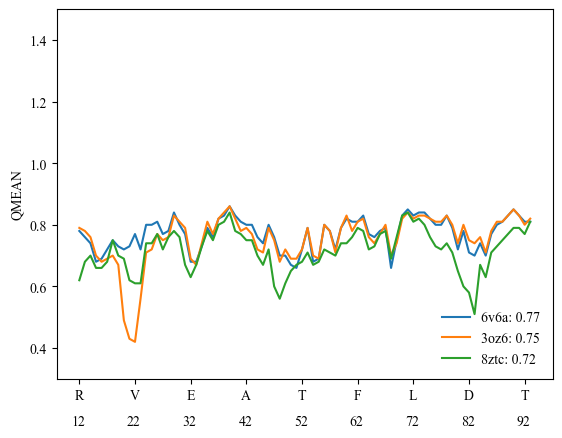

In [26]:
start= 19
stop = 42
def show_qmean(
        qmeans:dict, start:int, stop:int,step:int = 1, 
        resi:bool = True, figname:str = None
):
    for qmean in qmeans:
        auc = sum(qmeans[qmean][start:stop])
        plt.plot(qmeans[qmean][start:stop], label = f'{qmean}: {auc/(stop-start):.2f}')
        print(auc)
    show_seq = target[start: stop: step]
    
    plt.xticks(np.arange(0, stop-start, step),show_seq)

    if resi:
        for i in (np.arange(start, stop, step)):
            plt.text(i-(step/7)-start, 0.15, i)
        
    plt.ylabel('QMEAN')
    plt.ylim(0.3, 1.5)
    plt.legend(
        #bbox_to_anchor=(0.8, 0.4), 
        loc='lower right', frameon=False
    )
    if figname is None:
        plt.show()
    else:
        plt.savefig(figname, dpi = 600)
    #plt.savefig('test.png')

#show_qmean(qmeans, start, stop, step = 10,figname='qmean12_94.png')
show_qmean(qmeans, 
           12, 94, 10, 
           figname='qmean12_94(2).png'
           )

17.830000000000002
16.51
16.73
63.18
61.89
58.81


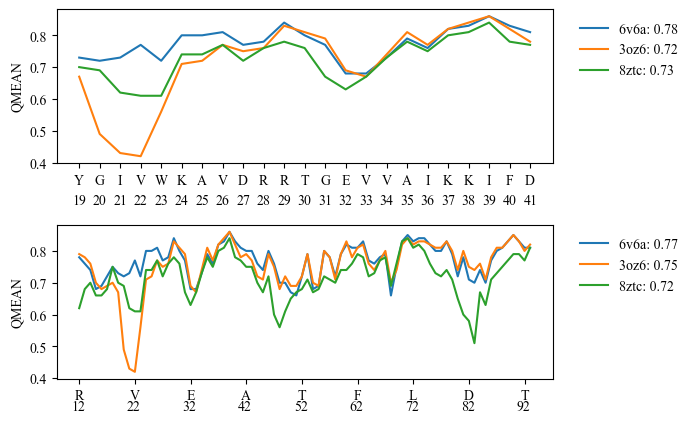

In [148]:
fig, ax = plt.subplots(ncols=1, nrows=2)

start, stop, step = 19, 42, 1
for qmean in qmeans:
    auc = sum(qmeans[qmean][start:stop])
    ax[0].plot(qmeans[qmean][start:stop], label = f'{qmean}: {auc/(stop-start):.2f}')
    print(auc)
show_seq = target[start: stop: step]

ax[0].set_xticks(np.arange(0, stop-start, step),show_seq)


for i in (np.arange(start, stop, step)):
    ax[0].text(i-(step/3)-start, 0.27, i)
    
ax[0].set_ylabel('QMEAN')
ax[0].legend(bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)


start, stop, step = 12, 94, 10
for qmean in qmeans:
    auc = sum(qmeans[qmean][start:stop])
    ax[1].plot(qmeans[qmean][start:stop], label = f'{qmean}: {auc/(stop-start):.2f}')
    print(auc)
show_seq = target[start: stop: step]

ax[1].set_xticks(np.arange(0, stop-start, step),show_seq)


for i in (np.arange(start, stop, step)):
    ax[1].text(i-(step/7)-start, 0.3, i)
    
ax[1].set_ylabel('QMEAN')
ax[1].legend(bbox_to_anchor=(1.03, 1), loc='upper left', frameon=False)
fig.subplots_adjust(hspace=0.4)
plt.savefig('qmean.png', dpi = 600, bbox_inches='tight')



6v6a.json
3oz6.json
8ztc.json


C:\Users\hp\AppData\Local\Temp\ipykernel_17212\2975594.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


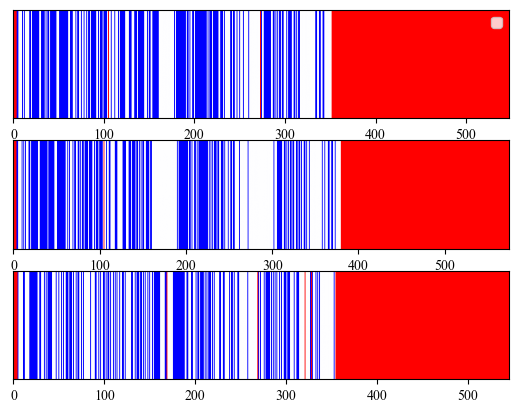

In [77]:
fig, ax = plt.subplots(nrows=3, ncols=1)
j = 0
for metadata in metadata_all:

    with open(os.path.join('metadata', metadata), 'r', encoding='utf-8') as file:
        data = json.load(file)
        chain = list(data['targets'][0]['templates'])[0]['chain']
        template = data['targets'][0]['templates'][0]['tpl_seq']
        tgt = data['targets'][0]['templates'][0]['trg_seq']
        score = []
        for i in range(len(template)):
            if template[i] == '-':
                score.append(-1)
            elif template[i] != tgt[i]:
                score.append(0)
            else:
                score.append(1)
    print(metadata)
    ax[j].imshow(np.array(score).reshape(1, -1), aspect='auto', cmap='bwr_r')
    ax[j].set_yticks([])
    
    j+=1
    ax[0].legend()
    #fig.legend()

6v6a.json
3oz6.json
8ztc.json


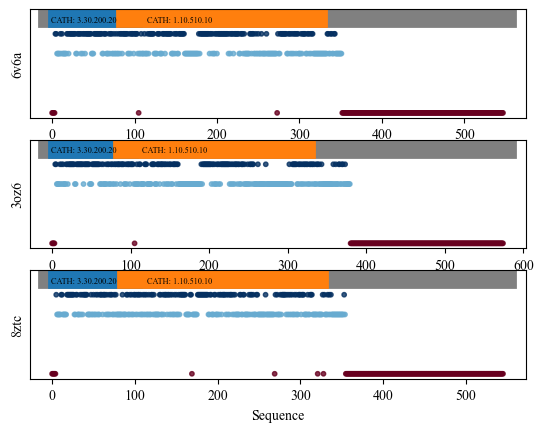

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1)
j = 0
for metadata in metadata_all:
    label = re.search(r'(.+)\.json', metadata).group(1)
    with open(os.path.join('metadata', metadata), 'r', encoding='utf-8') as file:
        data = json.load(file)
        chain = list(data['targets'][0]['templates'])[0]['chain']
        template = data['targets'][0]['templates'][0]['tpl_seq']
        tgt = data['targets'][0]['templates'][0]['trg_seq']
        score = []
        for i in range(len(template)):
            if template[i] == '-':
                score.append(-1)
            elif template[i] != tgt[i]:
                score.append(0.5)
            else:
                score.append(1)
    print(metadata)
    y = np.array(score).reshape(1, -1)
    ax[j].scatter(
        np.arange(len(tgt)),np.array(score).reshape(1, -1), 
        c = y,cmap='RdBu', s = 10, 
        alpha=0.8, 
        
    )
    domain1 = np.arange(12,94)
    domain2 = np.arange(95,319)
    
    
    linewidth = 20
    ax[j].plot(np.arange(
        len(tgt)), np.array(1.5).repeat(len(tgt)), linewidth = linewidth, color = 'grey'
    )
    ax[j].plot(
        domain1, np.array(1.5).repeat(len(domain1)), linewidth = linewidth, 
        label = 'Phosphorylase kinase domain 1'
    )
    ax[j].plot(
        domain2, np.array(1.5).repeat(len(domain2)), linewidth = linewidth, 
        label = 'Transferase (phosphotransferase) domain 1'
    )
    
    ax[j].set_yticks([])
    ax[j].set_ylabel(label)
    
    ax[j].text(-1, 1.3, 'CATH: 3.30.200.20', {'size': 6})
    ax[j].text(115, 1.3, 'CATH: 1.10.510.10', {'size': 6})
    j+=1
#plt.legend()
plt.xlabel('Sequence')

#plt.savefig('coverage.png', dpi = 600)

    #fig.legend()

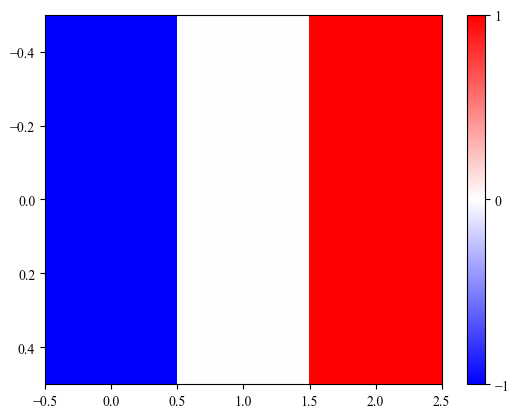

In [106]:
a = np.array([-1, 0 , 1]).reshape(1, -1)
im = plt.imshow(a, aspect='auto', cmap='bwr')
plt.colorbar(im, ticks=[-1, 0, 1])

In [38]:
with open(os.path.join('metadata', '8ztc.json'), 'r', encoding='utf-8') as file:
    data = json.load(file)
    chain = list(data['targets'][0]['templates'])[0]['chain']
    template = data['targets'][0]['templates'][0]['tpl_seq']
    print(template)

-----DFIVDERYTVTKELGQGAYGIVCAAVNNQTSEGVAIKKVTNVFSKKILAKRALREIKLLQHFRGHRNITCLYDMDIPRPDNFNETYLYEELMECDLAAIIRSGQPLTDAHFQSFIYQILCGLKYIHSANVLHRDLKPGNLLVNADCELKICDFGLARGFSVDPE-ENAGYMTEYVATRWYRAPEIMLSFQSYTKAIDVWSVGCILAELLGGRPFFKGRDYVDQLNQILHILGTPNEETLSRIGSPRAQEYVRNLPFMAKKPFPT-LFPNANPDALDLLDRMLAFDPSSRISVEQALEHPYLHIWHDASDEPDCPTT-FNFDFE-VVEDVGEMRKMILDEVYRFRQLVRTA-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
